# 실습의 목표
1. Python을 기본적으로 어떻게 사용하는지 학습
2. Numpy 소개
3. Logistic regression을 사용하여 고양이와 강아지를 구분하는 알고리즘 구현

# Jupyter notebook
* 실습에서 사용할 툴은 `jupyter notebook`이라는 툴로 PC에 설치되어 있는 python을 웹에서 쉽고 직관적으로 사용할 수 있도록 만들어놓은 것임.
* 화면에 보이는 각 블록을 `Cell`이라고 하며 cell 내부에 코드를 작성하거나 문서를 작성할 수 있음
* Cell 내부에 python 코드를 작성 후 키보드의 `ctrl + enter` 혹은 `shift + enter`를 누르거나 위의 툴바에 있는 `Run` 버튼을 클릭하면 해당 코드가 실행됨

# **1 - Python 기본**

## **0. Python에서 특정 변수에 있는 값을 보고싶을 때 - Print**

In [1]:
x = "Hello World" # x 변수에 Hello World라는 string을 넣음
print("x: ", x) 

x:  Hello World


## **1-1. Python의 기본 자료형 종류**

### Nuimbers: 연산 가능한 값.

In [2]:
x = 3
print(type(x)) # Prints "<class 'int'>"
print(x)       # Prints "3"
print(x + 1)   # Addition; prints "4"
print(x - 1)   # Subtraction; prints "2"
print(x * 2)   # Multiplication; prints "6"
print(x ** 2)  # Exponentiation; prints "9"
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'int'>
3
4
2
6
9
4
8
<class 'float'>
2.5 3.5 5.0 6.25


### Booleans: 주어진 조건이 참인지 거짓인지를 나타내는 값

In [3]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


### Strings: 숫자가 아닌 문구를 나타내는 값. 앞뒤를 따옴표로 묶어줌

In [4]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello
5
hello world
hello world 12


## **1-2. Python의 기본 Container: List**

### List: 여러 값들을 저장하고 있는 것. 대괄호 ([])로 묶어줌

In [5]:
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"


[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


### List는 특정 범위만 추출할 수 있음

In [6]:
print(xs)
print(xs[:])
print(xs[:2])
print(xs[1:3])

[3, 1, 'foo']
[3, 1, 'foo']
[3, 1]
[1, 'foo']


## **1-3 Python의 loop: for문 (특정 조건만큼 반복해서 작업을 수행하는 것)**

### 기본적인 사용법

In [7]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


### List에 있는 요소들을 for문으로 접근 가능

In [8]:
sample_list= [2,5,6,'??','!!',True, False]
for i in sample_list:
    print(i)

2
5
6
??
!!
True
False


## **1-4 Python의 function: def**
<img src="Figure/function.png" style="width:700px;height:150px;">


### 예시 1: Input의 음, 양을 알려주는 function

In [9]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

In [10]:
for x in [-1, 0, 1]:
    print('Current x: ', x)
    print('부호: ', sign(x))

Current x:  -1
부호:  negative
Current x:  0
부호:  zero
Current x:  1
부호:  positive


### 예시 2: 특정 조건에 따라 다른 print를 하는 함수

In [11]:
def hello(name, loud=False):
    if loud:
        print('HELLO!!!, %s!!!' % name.upper())
    else:
        print('Hello, %s' % name)

In [12]:
hello('Bob') # Prints "Hello, Bob"
hello('Fred', loud=True)  # Prints "HELLO, FRED!"

Hello, Bob
HELLO!!!, FRED!!!


# **2 - Numpy**
* 각종 수식들을 간편하게 사용할 수 있는 python core library
* Matrix 연산을 손쉽게 할 수 있는 것이 가장 큰 장점

## 0. Import numpy library
* python의 가장 큰 장점은 수많은 라이브러리를 쉽게 사용할 수 있다는 점.
* `import` 키워드를 이용

In [13]:
import numpy as np # numpy library를 import 하는데 이걸 np라는 단축어로 사용하겠다. 

In [14]:
x = np.array([1, 2, 3])
print(x)
x = np.zeros((3,3))
print('zeros: ')
print(x)
x = np.ones((3,3))
print('ones: ')
print(x)
x = np.random.random((3,3))
print('random matrix: ')
print(x)


[1 2 3]
zeros: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
ones: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
random matrix: 
[[0.99641734 0.69088239 0.15896724]
 [0.64253289 0.83500754 0.67618213]
 [0.21416031 0.49799771 0.97358455]]


## 1. Sigmoid using numpy
$f(x) =  \frac{1}{1+e^{-x}}$
<img src="Figure/sigmoid.png">

### Exponential ($e^{x}$) using numpy - np.exp(x)

In [15]:
# Scalar (one number)
x = 1
exponential = np.exp(x)
print('x = ', x)
print("e^{x} = ", exponential)

# matrix 
x = np.ones((3,3))
exponential = np.exp(x)
print('x = ', x)
print("e^{x} = ", exponential)

x =  1
e^{x} =  2.718281828459045
x =  [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
e^{x} =  [[2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183]]


### Implement sigmoid function using numpy

In [16]:
def sigmoid_numpy(x):
    result = 1 / (1 + np.exp(-x))
    return result

In [17]:
# Scalar (one number)
x = 1
sigmoid = sigmoid_numpy(x)
print('x = ', x)
print("sigmoid(x) = ", sigmoid)

# matrix 
x = np.random.random((3,3))
sigmoid = sigmoid_numpy(x)
print('x = ', x)
print("sigmoid(x) = ", sigmoid)

x =  1
sigmoid(x) =  0.7310585786300049
x =  [[0.9364322  0.38852478 0.32031375]
 [0.2149859  0.38957947 0.02260094]
 [0.40695714 0.32551722 0.02865901]]
sigmoid(x) =  [[0.71837841 0.59592752 0.57940071]
 [0.55354042 0.59618146 0.50564999]
 [0.60035803 0.58066825 0.50716426]]


### 구현한 sigmoid function을 plot해보기

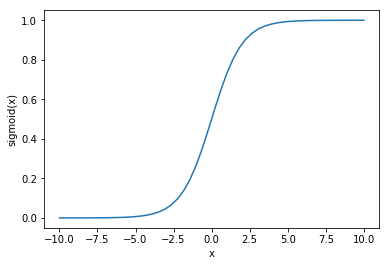

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10)
y = sigmoid_numpy(x)
plt.figure()
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.plot(x,y)
plt.show()